In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

# Pre-processing

### A bit of exploration

In [ ]:
data=pd.read_csv("kidney_disease.csv")

In [ ]:
data.head(10)

id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44   7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38   6000  NaN   no   no   no  good   no   no   
2  notpresent  ...   31   7500  NaN   no  yes   no  poor   no  yes   
3  notpresent  ...   32   6700  3.9  yes   no   no  poor  yes  yes   
4  notpresent  ...   35   7300  4.6   no   no   no  good   no   no   
5  notpresent  ...   39   7800  4.4  yes  yes   no  good  yes   no   
6  notpresent  ...   36    NaN  NaN   no   no   no  good   no   no   
7  notpresent  ...   44   6900    5   no  yes   no  good  yes   no   
8  notpresent  ...   33   9600  4.0  yes  yes   no  good   no  yes   
9  notpresent  ...   29  12100  3.7  yes  yes   no  poor   no  yes   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd  
5            ckd  
6            ckd  
7            ckd  
8            ckd  
9            ckd  

[10 rows x 26 columns]

We can see there are missing values.  
If their number is considerable, then we'd have to be careful about which imputation technique to use.  
There is also an extra 'id' column that needs to be dropped.

In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Feature names are abbreviated.  


In [ ]:
for i in data.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

We can see there are typos that need to be fixed.  
It's good that there are no missing values in the target column.  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Many features are mistyped.  
Some features have quite a lot of missing values.  
One option is to drop them.  
I'll be using the KNNImputer from sklearn.

In [ ]:
data.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

### Data Cleaning

Let's deal with typos first. 

In [ ]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

Now we drop that extra 'id' column.

In [ ]:
data.drop('id',axis=1,inplace=True)
data.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            yes  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            yes  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            yes  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            yes  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            yes  

[5 rows x 25 columns]

As feature names are abbreviated,  it would be better to use their actual (and meaningful) names.  

In [ ]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

Let's deal with mistyped features now.

In [ ]:
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
unique values in Pus Cells:
 ['normal' 'abnormal' nan]
unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
unique values in Bacteria:
 ['notpresent' 'present' nan]
unique values in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99.

Some numerical features are mistyped as strings.  
So converting them to numericals again

In [ ]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [ ]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [ ]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

Now that we've dealt with that, let's separate categorical and numerical features.
Numerical features were already put together in a list.

In [ ]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

In [ ]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

Now that the data is cleaned, we need to deal with those missing values.  
We'll do some further exploration first, as that could help us in picking a proper imputation method.

### Further Exploration

Let's take a look at categorical features.

In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [ ]:
style.use('seaborn-darkgrid')

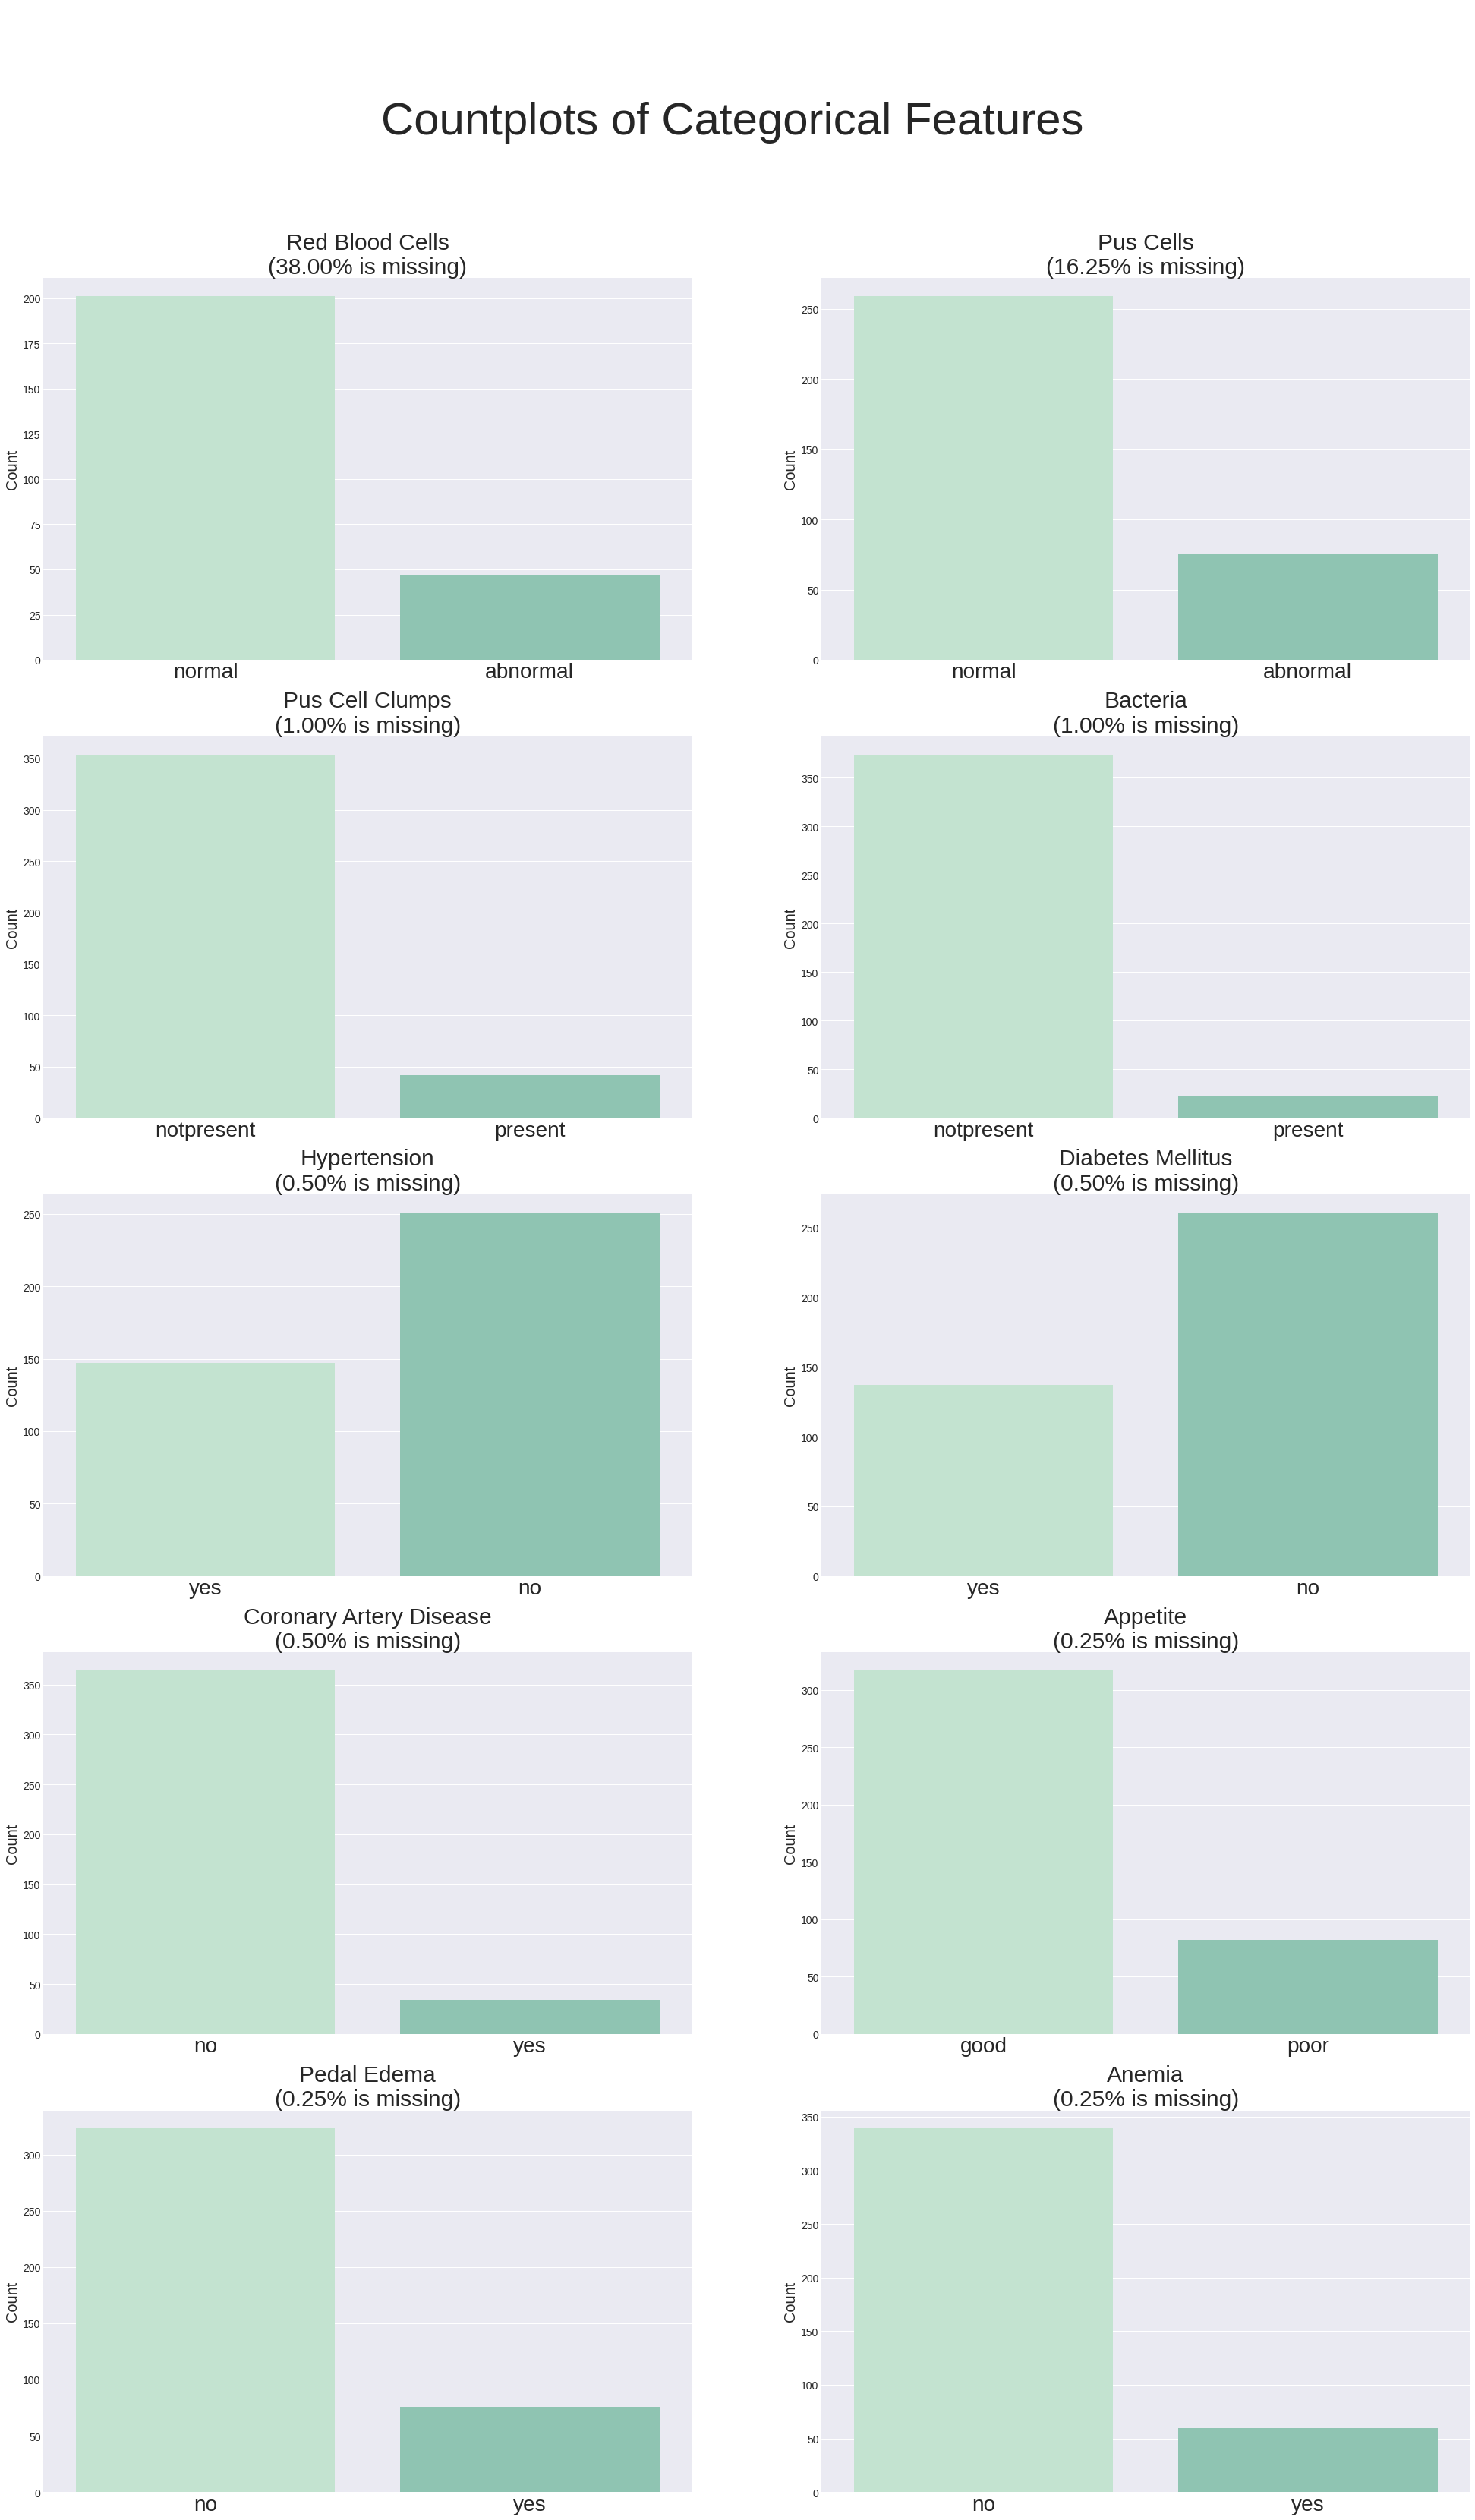

In [ ]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=28)

plt.show()

##### Notes:
Some features have very high percentages of missing values while some have almost none.  
Certain abnormalities/diseases seem relatively common in this dataset, such as diabetes and hypertension.  


Let's take a look at missing values.

In [ ]:
style.use('seaborn-darkgrid')

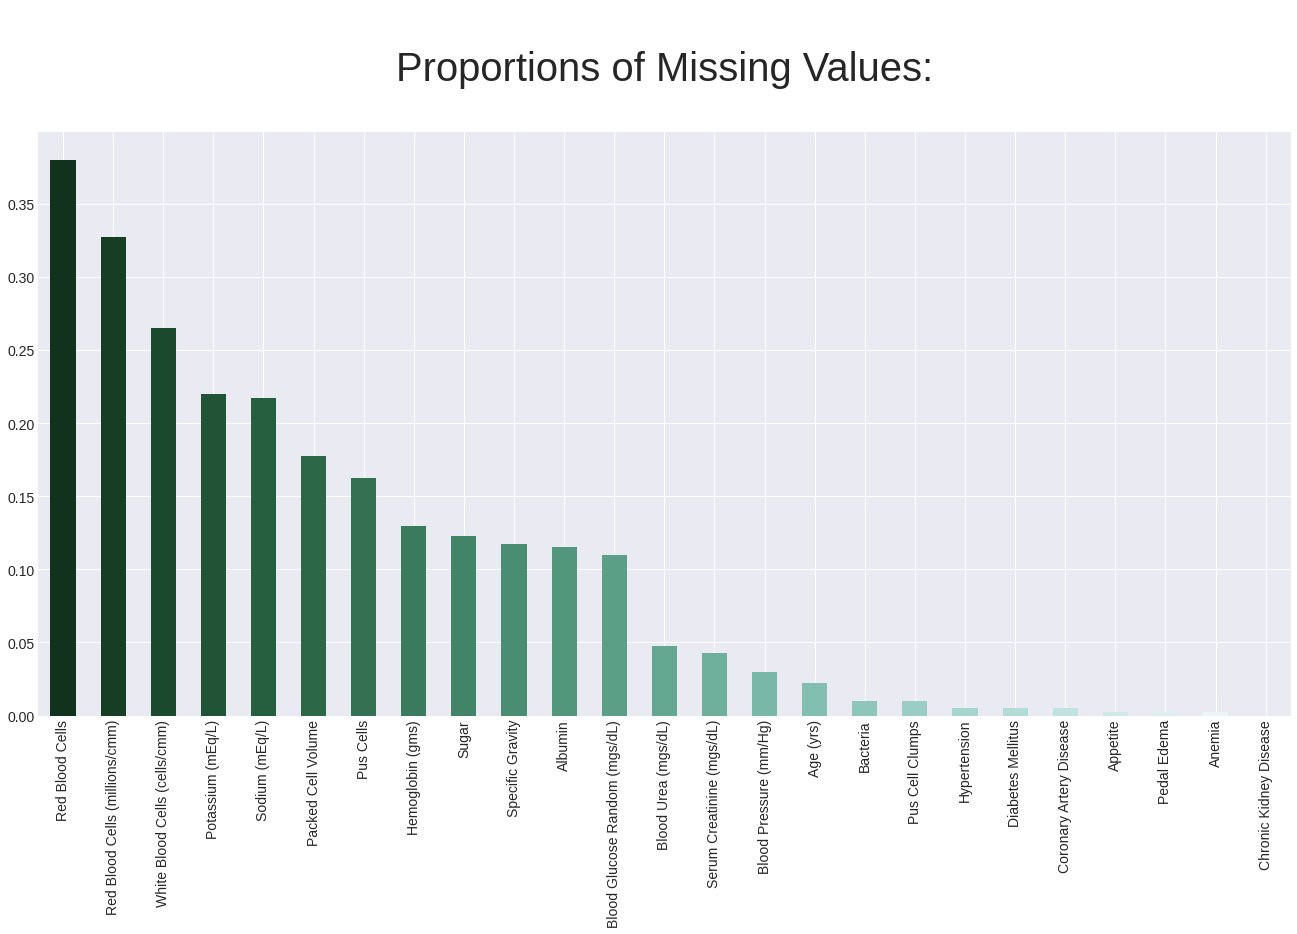

In [ ]:
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

We're going with KNN for imputation.  
But we have to encode the categorical features first.  
As said earlier, One-Hot Encoding would be perfect here as every categorical feature has only 2 values, which means we won't be increasing dimensions.  

### One-Hot Encoding

In [ ]:
onehotdata=pd.get_dummies(data,drop_first=True,prefix_sep=': ')
onehotdata.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

   Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                          121.0                 36.0   
1                            NaN                 18.0   
2                          423.0                 53.0   
3                          117.0                 56.0   
4                          106.0                 26.0   

   Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  ...  \
0                        1.2             NaN                NaN  ...   
1                        0.8             NaN                NaN  ...   
2                        1.8             NaN                NaN  ...   
3                        3.8           111.0                2.5  ...   
4                        1.4             NaN                NaN  ...   

   Pus Cells: normal  Pus Cell Clumps: present  Bacteria: present  \
0                  1                         0                  0   
1                  1                         0                  0   
2                  1                         0                  0   
3                  0                         1                  0   
4                  1                         0                  0   

   Hypertension: yes  Diabetes Mellitus: yes  Coronary Artery Disease: yes  \
0                  1                       1                             0   
1                  0                       0                             0   
2                  0                       1                             0   
3                  1                       0                             0   
4                  0                       0                             0   

   Appetite: poor  Pedal Edema: yes  Anemia: yes  Chronic Kidney Disease: yes  
0               0                 0            0                            1  
1               0                 0            0                            1  
2               1                 0            1                            1  
3               1                 1            1                            1  
4               0                 0            0                            1  

[5 rows x 25 columns]

In [ ]:
names={}
for name in data.columns:
    for ohname in onehotdata.columns:
        if name+': ' in ohname and name in categoricals:
            names[name]=ohname
            for i in range(400):
                if type(data.loc[i,name])!=str:
                    if math.isnan(data.loc[i,name]):
                        onehotdata.loc[i,ohname]=data.loc[i,name]

In [ ]:
test_oh_dt=pd.DataFrame(columns=data.columns)
for col in test_oh_dt.columns:
    if col in categoricals:
        test_oh_dt[col]=onehotdata[names[col]]
    elif col=='Chronic Kidney Disease':
        test_oh_dt[col]=onehotdata['Chronic Kidney Disease: yes']
    else:
        test_oh_dt[col]=onehotdata[col]

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
NQT=QuantileTransformer(output_distribution='normal')
UQT=QuantileTransformer(output_distribution='uniform')
NSPT=PowerTransformer(standardize=False) #I'll feed its output to a normalizer and see if that makes any difference.
SPT=PowerTransformer()
RS=RobustScaler() #default
WRS=RobustScaler(quantile_range=(15,85)) # a "wider" range
SS=StandardScaler()

Transformers=[NQT,UQT,NSPT,SPT,RS,WRS,SS]
MMS=MinMaxScaler()

Pipes=[] #they're not actually pipelines, except for one,
#but initially I was going to normalize all of them, and didn't bother to change the name later
for tr in Transformers:
    p=make_pipeline(tr)
    Pipes.append(p)
Pipes[2]=make_pipeline(NSPT,MMS)

In [ ]:
datarrays=[]
for pipe in Pipes:
    arr=pipe.fit_transform(onehotdata)
    datarrays.append(arr)

In [ ]:
dataframes=[onehotdata]
for arr in datarrays:
    df=pd.DataFrame(arr,columns=onehotdata.columns)
    dataframes.append(df)

In [ ]:
categorical_feats=onehotdata.columns[14:]
numerical_feats=onehotdata.columns[:14]

### Imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knnimp=KNNImputer(weights='distance', n_neighbors=8)

In [ ]:
rrr=[onehotdata.to_numpy()]
for dfi in range(1,len(dataframes)):
    rrr.append(knnimp.fit_transform(dataframes[dfi]))

In [ ]:
arrs=[rrr[0]]
for i in range(1,len(rrr)):
    arrs.append(Pipes[i-1].inverse_transform(rrr[i]))

In [ ]:
impdf=[]
for i in range(len(arrs)):
    impdf.append(pd.DataFrame(arrs[i],columns=onehotdata.columns))

 Some NaNs got replaced with values between zero and one.  
Take a look:

In [ ]:
impdf[6].iloc[:,15].unique()

array([1.        , 0.        , 0.63160166, 0.88607326, 0.61387208,
       0.75862137, 0.70806966, 0.86137172, 0.63119148, 0.89543788,
       0.74179684, 0.77161848, 0.61793009, 0.82398101, 0.75406756,
       0.36706328, 0.5835219 , 0.74235729, 0.87901676, 0.64341621,
       0.36860117, 0.78812957, 0.45736785, 0.74810413, 0.73289946,
       0.88144675, 0.75573017, 0.51257409, 0.89459771, 0.2498657 ,
       0.89557894, 0.7636394 , 0.75378168, 0.89316823, 0.76532431,
       0.83814399, 0.5902046 , 0.88189939, 0.6411361 , 0.74195041,
       0.82964032, 0.86885068, 0.63890626, 0.48569735, 0.88566203,
       0.77744959, 0.63198161, 0.73726093, 0.61095653, 0.62328647,
       0.67830806, 0.71205989, 0.78204737, 0.40201877, 0.48129177])

All we have to do is use 0.5 as a threshhold. Everything above becomes 1, everything under becomes 0.

In [ ]:
test=impdf.copy()
for j in range(1,8):
    dat=test[j]
    for i in range(14,25):
        col=dat.iloc[:,i]
        for k in range(400):
            if col[k]>=0.5:
                col[k]=1
            else:
                col[k]=0

In [ ]:
test[6].iloc[:,16].unique()

array([0., 1.])

In [ ]:
onehotdata=impdf[1].copy()

In [ ]:
onehotdata.dropna().shape

(400, 25)

We have no more missing values

# Exploratory Data Analysis

In [ ]:
style.use('seaborn-darkgrid')

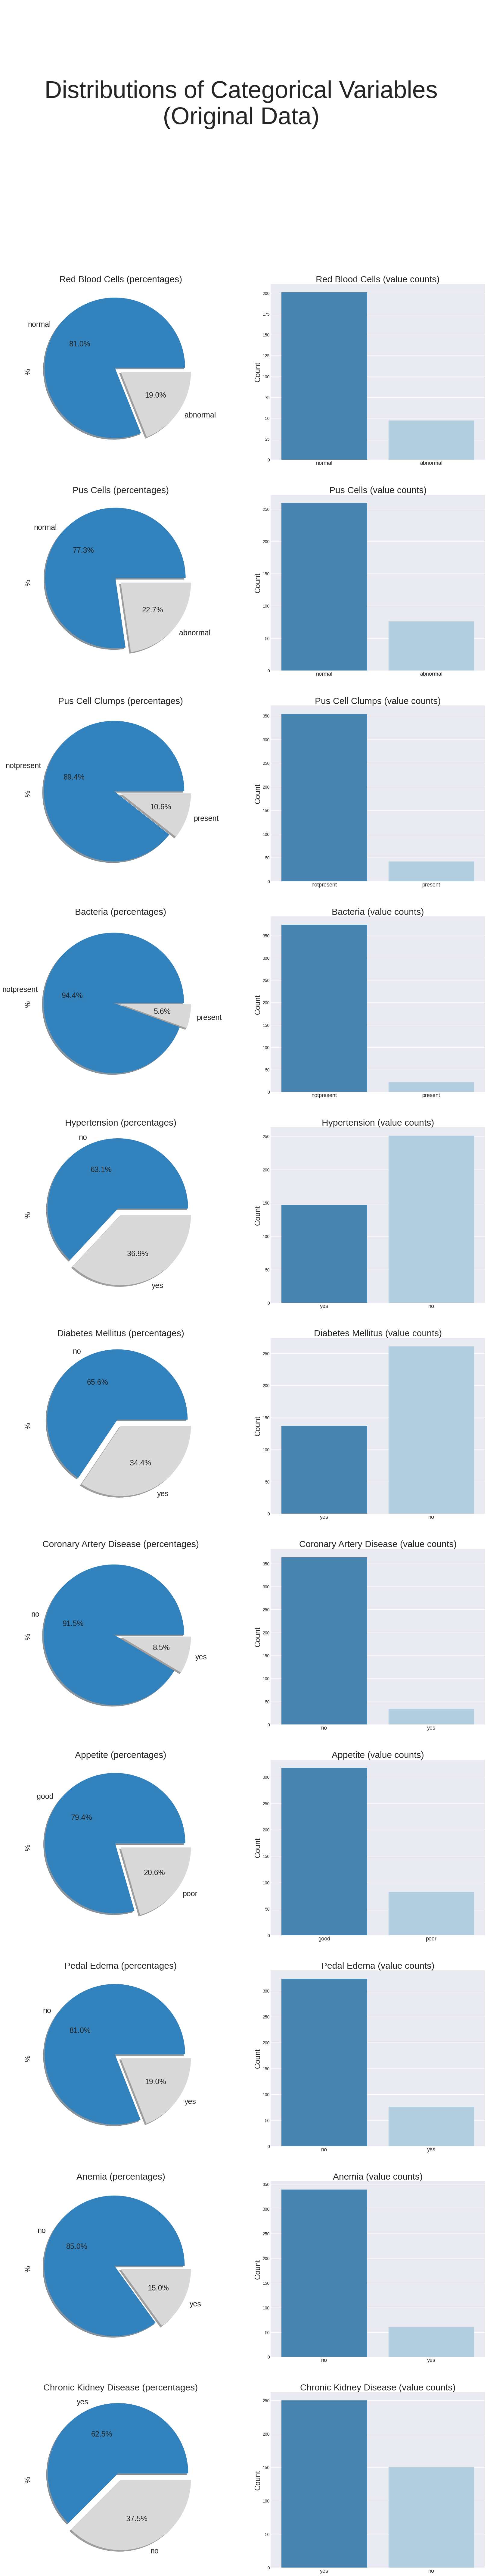

In [ ]:
n_rows, n_cols = (11,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 130))
figure.suptitle('\n\n\nDistributions of Categorical Variables\n(Original Data)', fontsize=80)

for i in range(len(categoricals)):
    column=categoricals[i]
    graph1=data[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                      ax=axes[i,0],
                                                      colormap="tab20c",
                                                      fontsize=25,
                                                      shadow=True,
                                                      explode=[0.1,0])
    axes[i,0].set_ylabel('%',fontsize=25)
    axes[i,0].set_title(column+' (percentages)', fontsize=30)
    graph2=sns.countplot(x=column,
                         data=data,
                         palette='Blues_r',
                         ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=25)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), Fontsize=18)
    axes[i,1].set_title(column+' (value counts)', fontsize=30)
    

graph1=data['Chronic Kidney Disease'].value_counts().plot.pie(autopct='%1.1f%%',
                                                              ax=axes[10,0],
                                                              colormap='tab20c',
                                                              fontsize=25,
                                                              shadow=True,
                                                              explode=[0.1,0])
axes[10,0].set_ylabel("%",fontsize=25)
axes[10,0].set_title('Chronic Kidney Disease (percentages)',fontsize=30)


graph2=sns.countplot(x='Chronic Kidney Disease',
                     data=data,
                     palette='Blues_r',
                     ax=axes[10,1])
axes[10,1].set_xlabel(None,fontsize=25)
axes[10,1].set_ylabel("Count",fontsize=25)
axes[10,1].set_xticklabels(axes[10,1].get_xticklabels(), Fontsize=18)
axes[10,1].set_title('Chronic Kidney Disease (value counts)', fontsize=30)

plt.show()

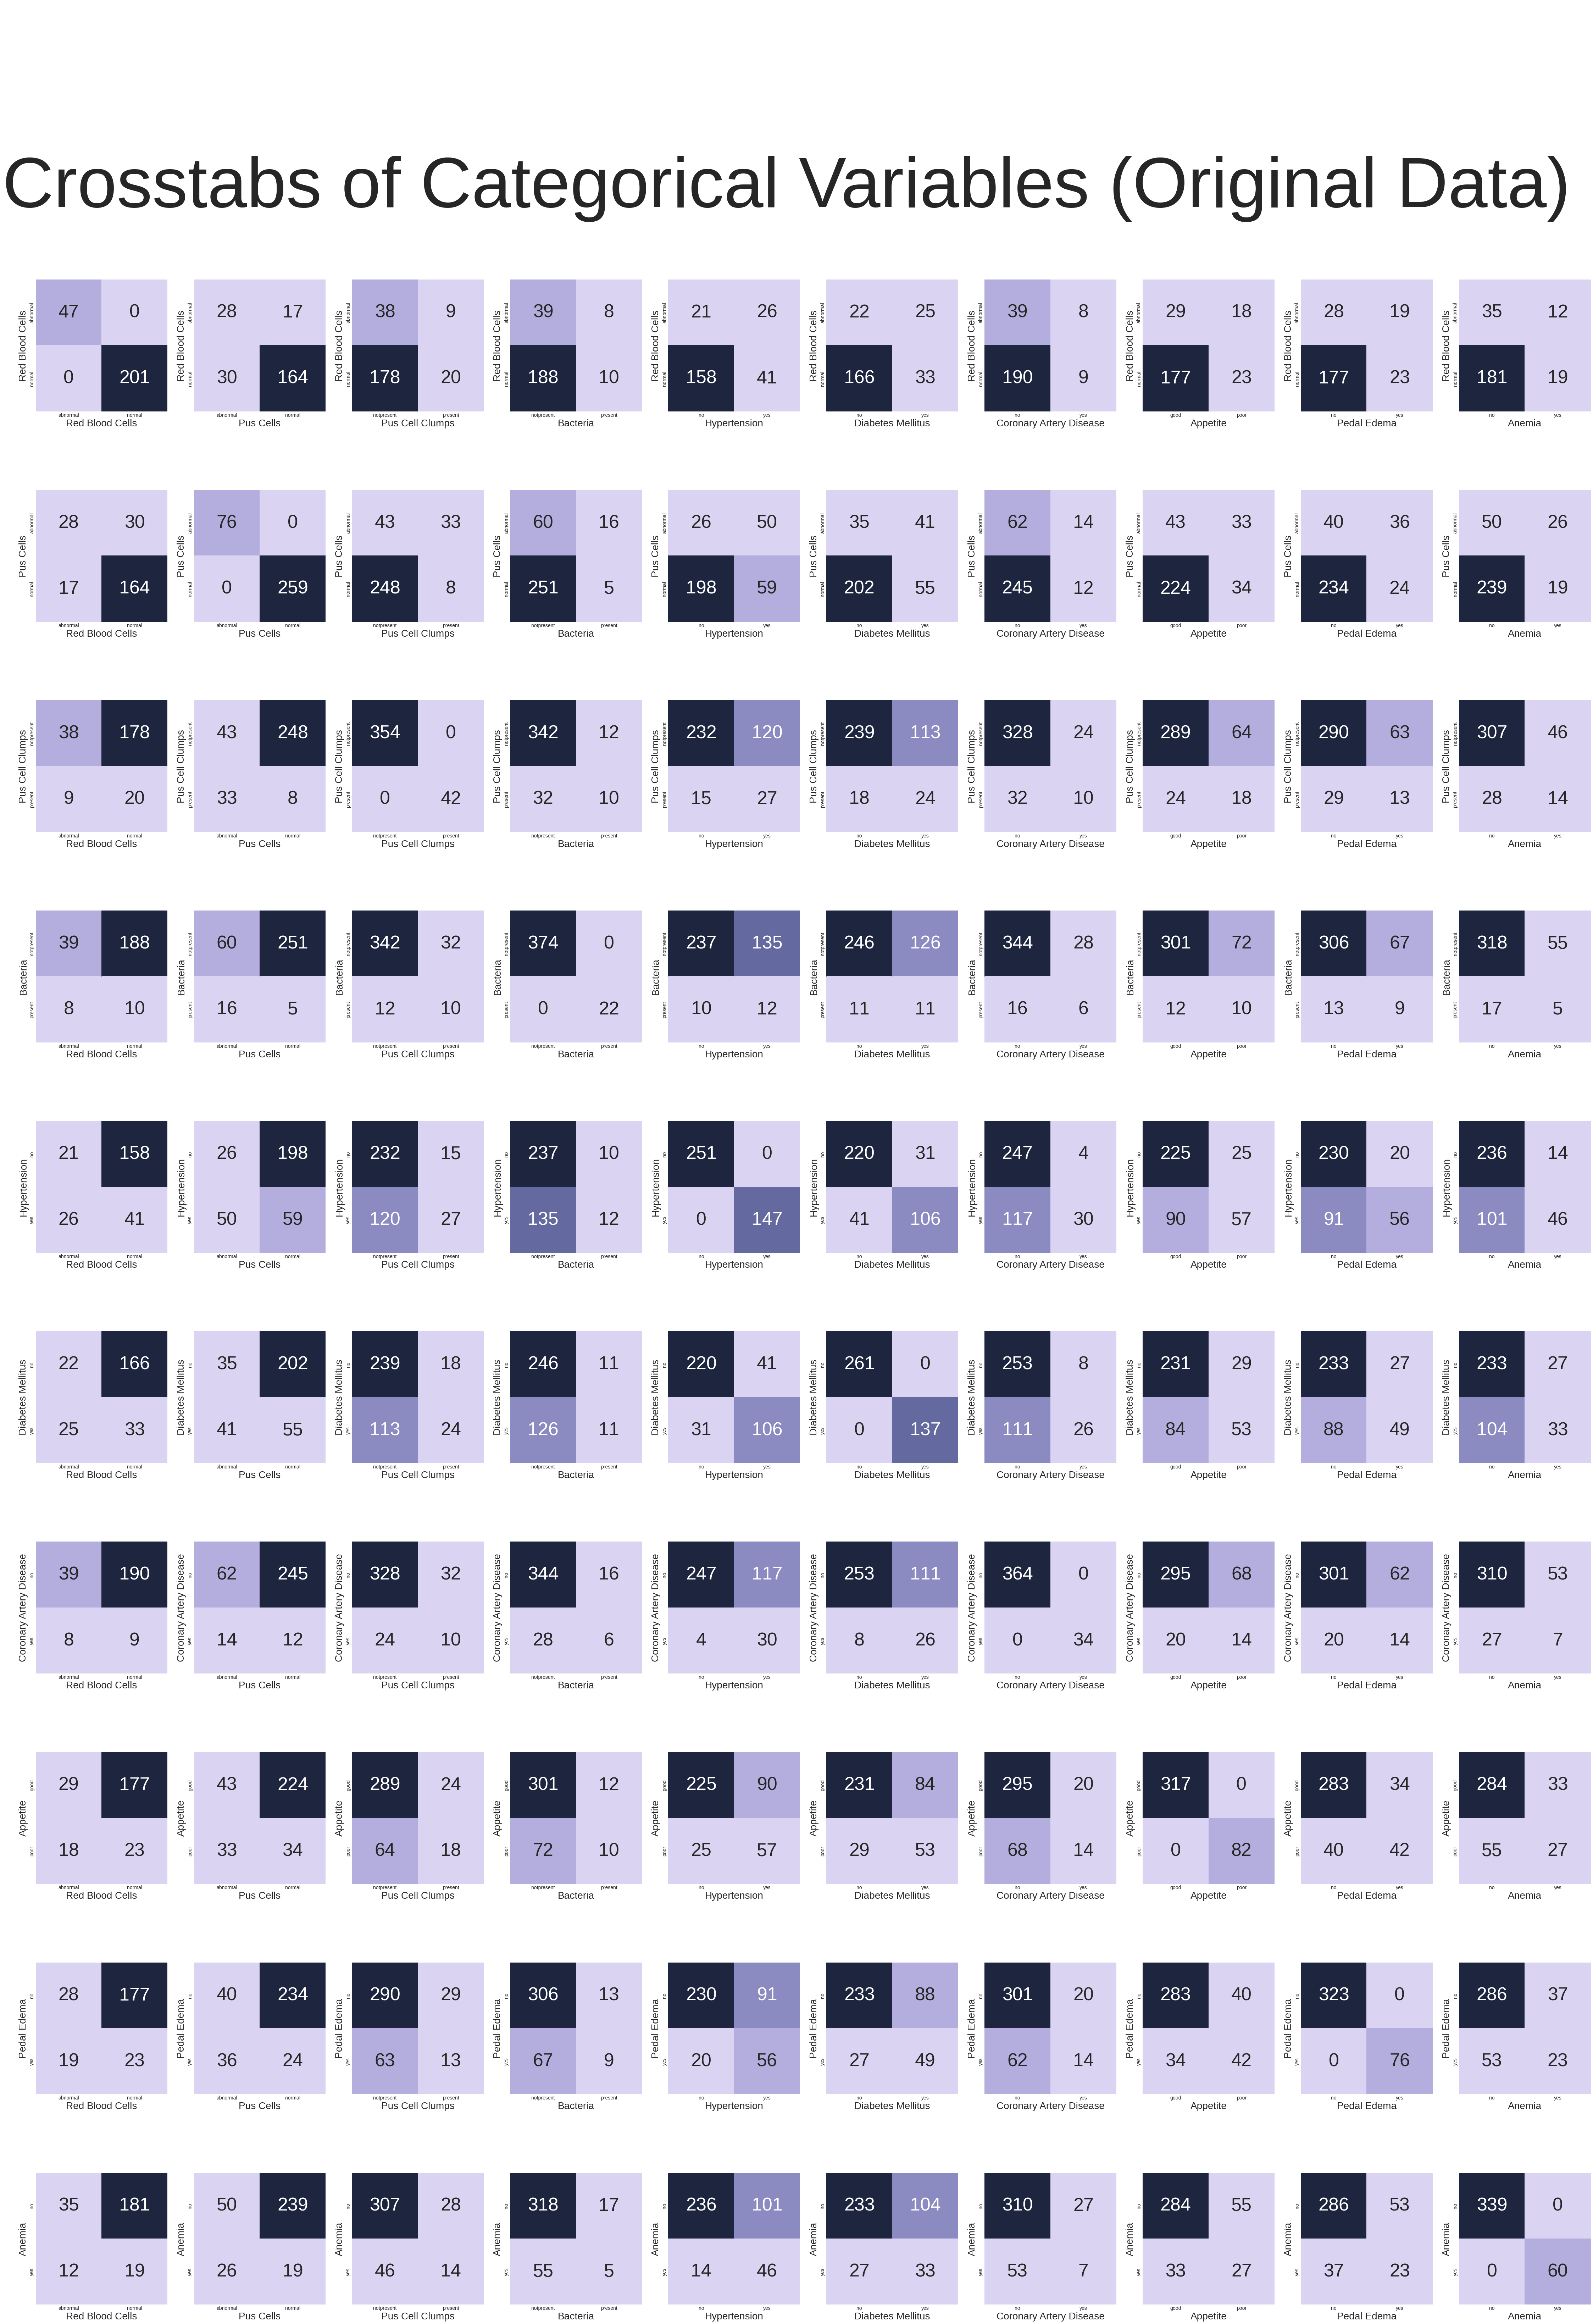

In [ ]:
n_rows, n_cols = (10,10)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nCrosstabs of Categorical Variables (Original Data)\n', fontsize=200)

for i in range(10):
    for j in range(10):
        sns.heatmap(#pd.crosstab(onehotdata.iloc[:,i+14],onehotdata.iloc[:,j+14]),
                    pd.crosstab(data[categoricals[i]],data[categoricals[j]]),
                    ax=axes[i,j],
                    cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                    square='True',
                    cbar=False,
                    annot=True,
                    annot_kws={'fontsize':52},
                    fmt='d')
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=28)
        
        axes[i,j].set_ylabel(axes[i,j].get_ylabel(),fontsize=28)
        
plt.show()

##### Notes:
I don't see much correlation between features.  
The more correlated they are, the more effective dimensionality reduction techniques would be.  

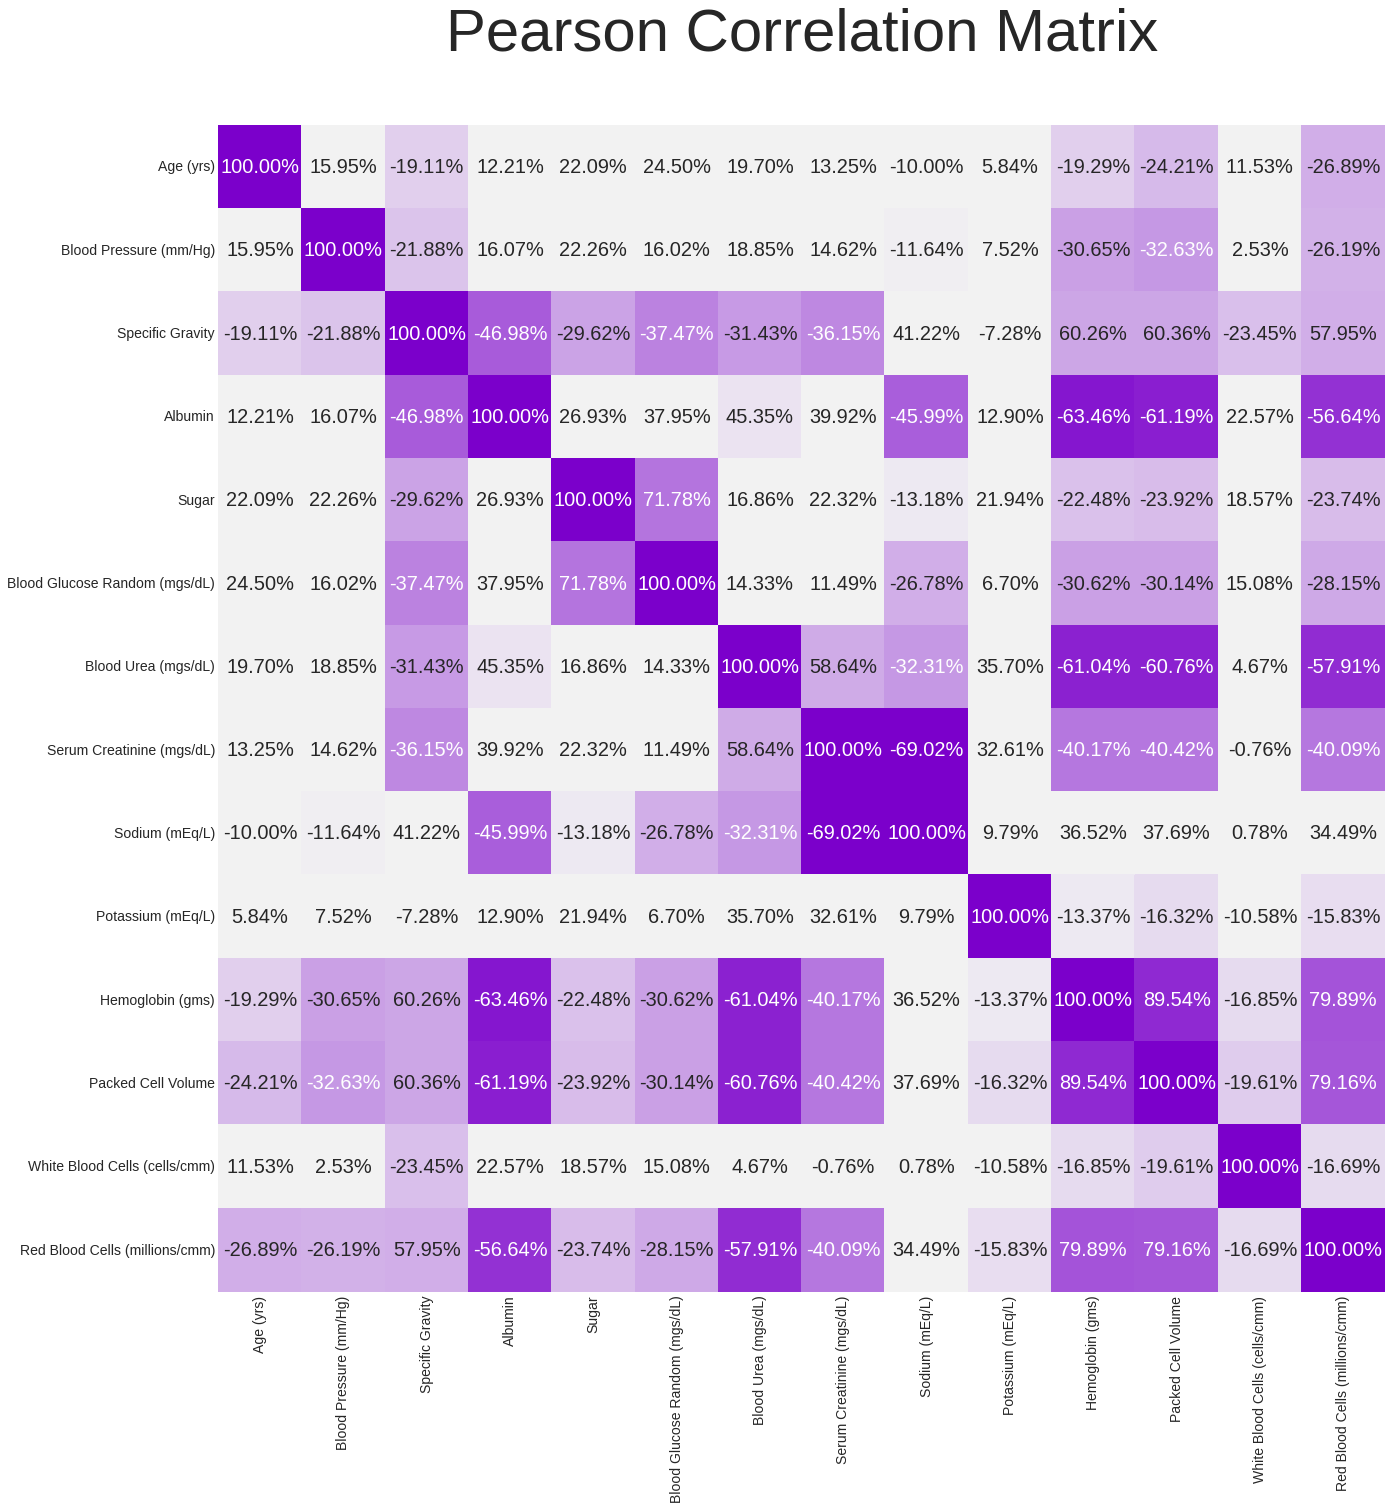

In [ ]:
numericdat=data.drop(categoricals, axis=1, inplace=False)

plt.figure(figsize=(20,20))

sns.heatmap(numericdat.corr("pearson"),
            cmap=sns.diverging_palette(280, 280, s=100, l=35, as_cmap=True,sep=80),
            square=True,
            annot=True,
            annot_kws={'fontsize':20},
            fmt='.2%',
            cbar=False)
plt.title("Pearson Correlation Matrix\n",fontsize=60)
plt.show()

##### Notes:
Same thing as with categorical features: practically no correlations.  

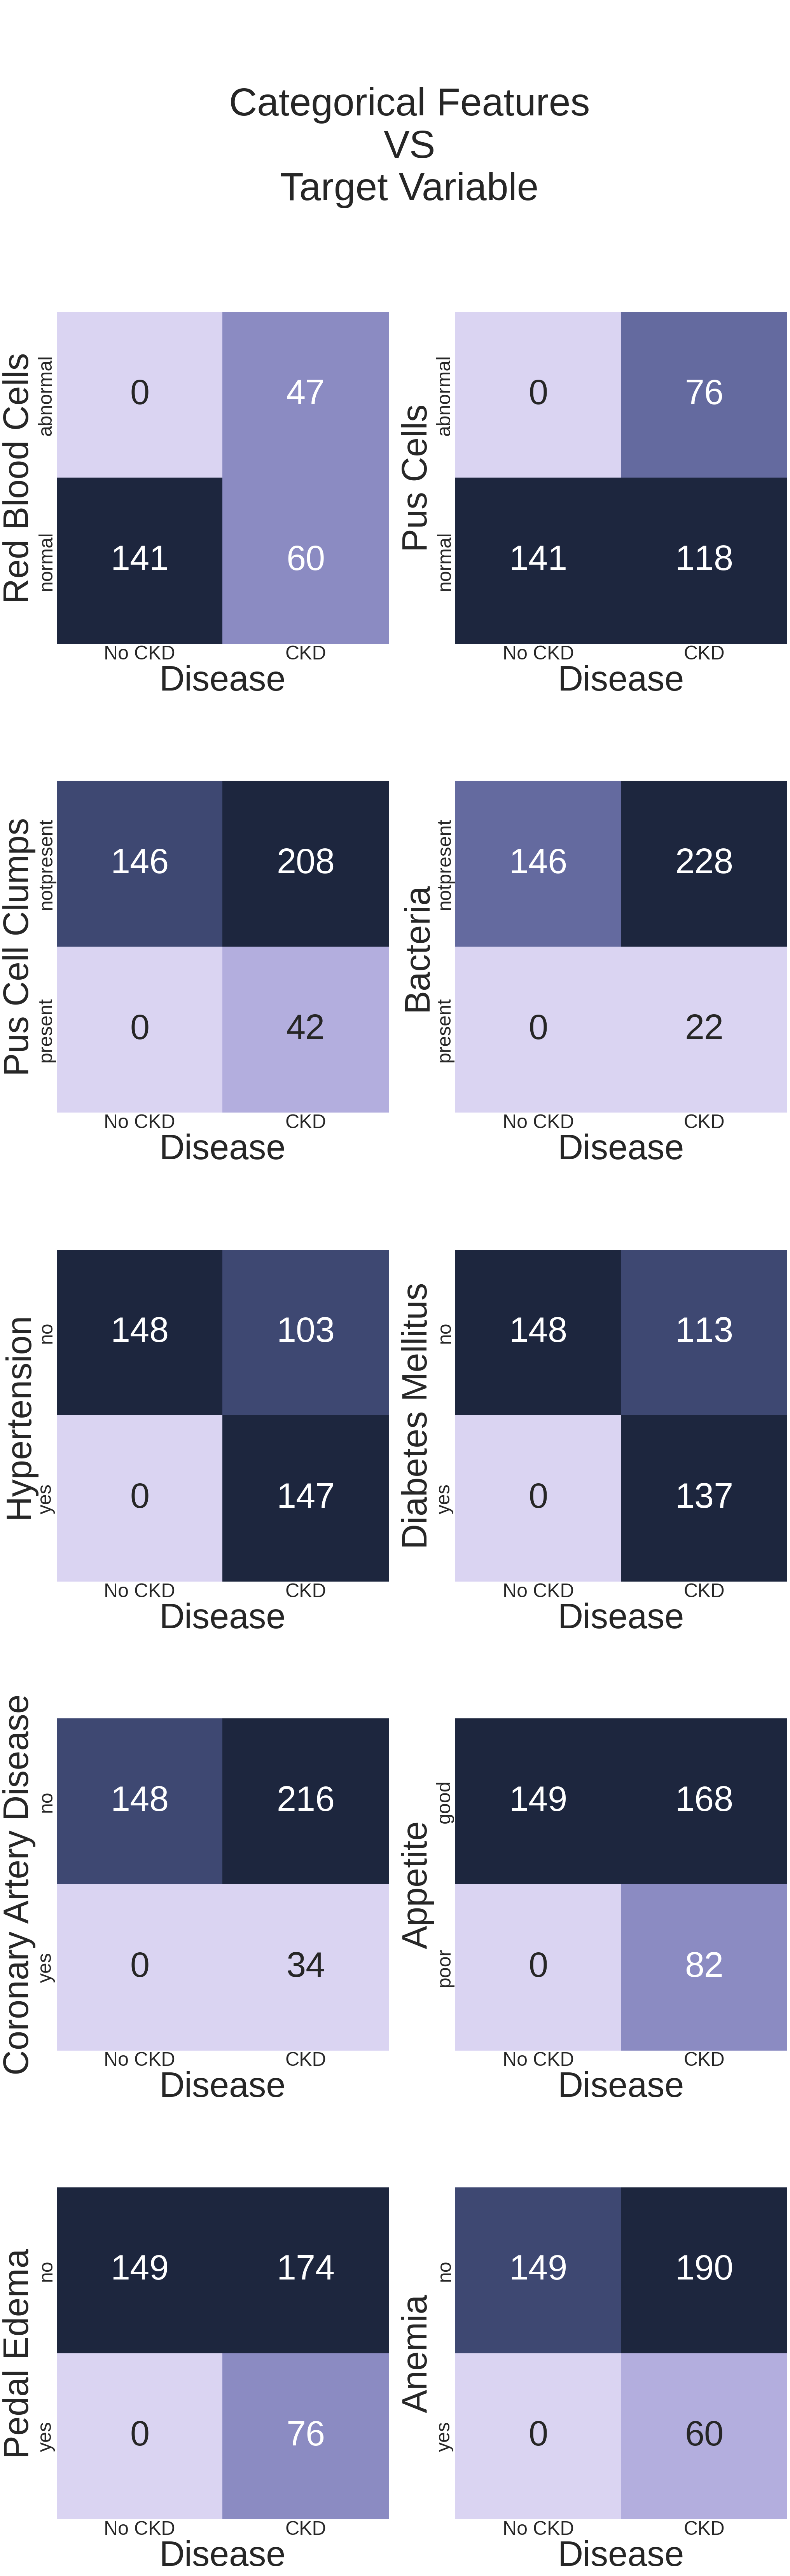

In [ ]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 100))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=100)

for index, column in enumerate(categoricals):
    
    i,j = (index // n_cols), (index % n_cols)
    
    sns.heatmap(pd.crosstab(data[column],data['Chronic Kidney Disease']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
        
    axes[i,j].set_xlabel("Disease", fontsize=90)

    axes[i,j].set_ylabel(column,fontsize=90)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=50)
    
    axes[i,j].set_xticklabels(["No CKD","CKD"],fontsize=50)

plt.show()

##### Notes:
Again, not much correlation.  


# Logistic Regression & Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

X = onehotdata.drop("Chronic Kidney Disease: yes",axis=1,inplace=False)
y = onehotdata['Chronic Kidney Disease: yes']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logreg.score(X_train,y_train)

0.9366666666666666

In [ ]:
logreg.score(X_test,y_test)

0.94

In [ ]:
sns.set(font_scale=1.5)

In [ ]:
def plot_conf_mat(y_test,y_preds):
    """
    This function will be heloing in plotting the confusion matrix by using seaborn
    """
    
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

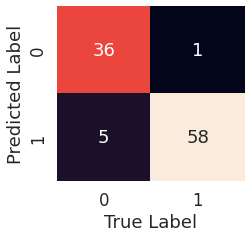

In [ ]:
log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

In [ ]:
import pickle

saved_model = pickle.dumps(logreg)

logreg_from_pickle = pickle.loads(saved_model)

logreg_from_pickle.predict(X_test)